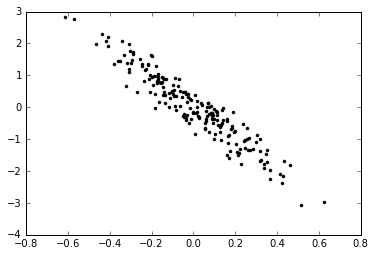

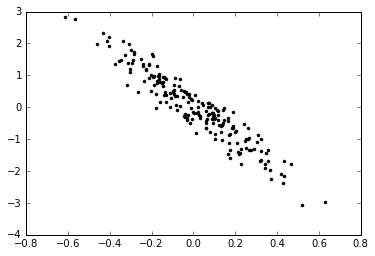

Ez (10, 200)
(10, 10)


ValueError: shapes (2,) and (200,) not aligned: 2 (dim 0) != 200 (dim 0)

In [13]:
## %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def plot_data(X):
    plt.plot(X[:,0], X[:,1], '.k')
    plt.show()
    
def center_data(X):
    mean = np.mean(X)
    return X - mean
    
X = np.loadtxt("Lab 2/dataForPPCAExample1.csv", delimiter=',')
plot_data(X)
plot_data(center_data(X))

def EM_ppca(X, LF):
    (N, D) = X.shape
    # prior s2, W
    s2 = 1.0
    W = np.ones((D, LF))
    
    # E-step
    M = W.T.dot(W) + s2 * np.eye(LF)
    Ez = np.linalg.inv(M).dot(W.T).dot(X.T)
    print ('Ez', Ez.shape)
    Ezzt = s2 * np.linalg.inv(M) + Ez.dot(Ez.T)
    print (Ezzt.shape)
    
    # M-step
    Wp = np.zeros((D, LF))
    Eznzn_sum = np.zeros((LF, LF))
    rs = np.linalg.inv(Ezzt)
    for i in range(N):
        Wp += X[i].dot(Ez[i].T)
    Wp = Wp.dot(rs)
    
    s2 = 0.0
    for i in range(N):
        tmp_x = X[i]
        first_term = np.dot(tmp_x.T, tmp_x)
        second_term = -2.0 * Ez[i].T.dot(Wp.T.dot(tmp_x))
        third_term = np.trace(Ezzt.dot(Wp.T).dot(Wp))
        s2 = first_term + second_term + third_term
    s2 = (s2 / (N * D))
    
    W = np.copy(Wp)
    
    return [W, s2]

[W, s2] = EM_ppca(X, 10)
